<a href="https://colab.research.google.com/github/BrunoAlexandreAmaral/Analise-sobre-uma-Loja-de-Varejo/blob/main/searchcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving house.xlsx to house.xlsx


In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel("house.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  BsmtFinSF1     1460 non-null   int64  
 12  BsmtFinSF2     1460 non-null   int64  
 13  BsmtUnfSF      1460 non-null   int64  
 14  TotalBsmtSF    1460 non-null   int64  
 15  1stFlrSF       1460 non-null   int64  
 16  2ndFlrSF       1460 non-null   int64  
 17  LowQualFinSF   1460 non-null   int64  
 18  GrLivAre

In [ ]:
df = df.dropna()

In [ ]:
df_nomralizado = pd.get_dummies(df)

In [ ]:
df_nomralizado.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,YrSold,SalePrice,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2008,208500,False,False,True,False,False,False,False,True
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,2007,181500,False,False,False,True,False,False,False,True
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2008,223500,False,False,True,False,False,False,False,True
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2006,140000,False,False,False,True,False,False,False,True
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2008,250000,False,False,True,False,False,False,False,True


In [ ]:
df_nomralizado = df_nomralizado.astype({"ExterQual_Ex":"int","ExterQual_Fa":"int","ExterQual_Gd":"int","ExterQual_TA":"int","ExterCond_Ex":"int","ExterCond_Fa":"int","ExterCond_Gd":"int","ExterCond_TA":"int"})

In [ ]:
df_nomralizado

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,YrSold,SalePrice,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2008,208500,0,0,1,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,2007,181500,0,0,0,1,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2008,223500,0,0,1,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,2006,140000,0,0,0,1,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2008,250000,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,2007,175000,0,0,0,1,0,0,0,1
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,2010,210000,0,0,0,1,0,0,0,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,2010,266500,1,0,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,2010,142125,0,0,0,1,0,0,0,1


<Axes: xlabel='SalePrice', ylabel='Count'>

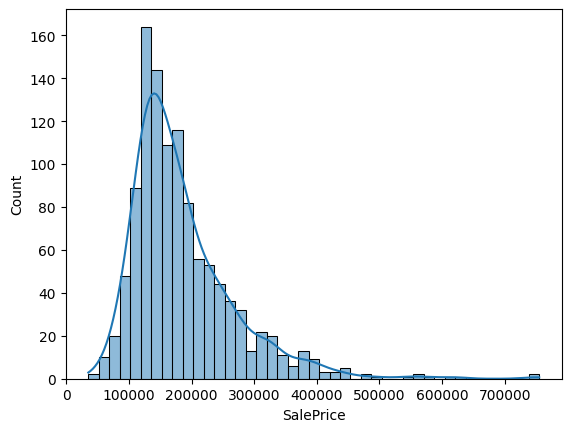

In [ ]:
sns.histplot(df_nomralizado, x="SalePrice", kde = True)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
df_nomralizado_dois = pd.DataFrame(Scaler.fit_transform(df_nomralizado), index= df_nomralizado.index, columns = df_nomralizado.columns)

<Axes: xlabel='SalePrice', ylabel='Count'>

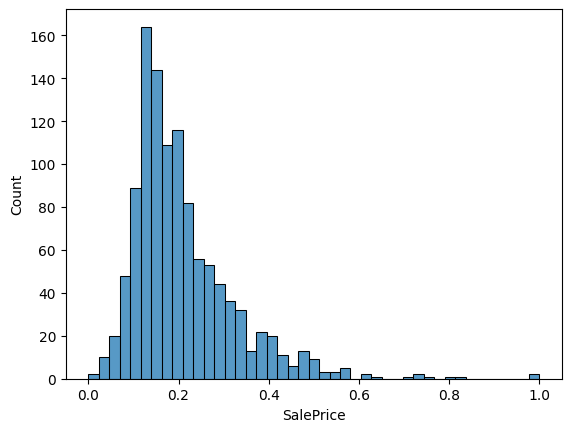

In [ ]:
sns.histplot(df, x= "SalePrice")

In [ ]:
x = np.array(df_nomralizado_dois.drop(columns={"SalePrice"}, axis=1))
y = np.array(df_nomralizado_dois["SalePrice"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100)

In [ ]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
predi = gbr.predict(x_test)

In [ ]:
rqs = r2_score(predi, y_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
print(rqs)
print(metrics.mean_absolute_error(predi,y_test))
print(metrics.mean_squared_error(predi,y_test))
print(np.sqrt(metrics.mean_absolute_error(predi,y_test)))

0.8433705988791006
0.02593507848478148
0.001797808572799612
0.16104371606735074


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
paramgrid = {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.2}

In [ ]:
grid_search = GridSearchCV(gbr, paramgrid, scoring = "r2", cv=2, n_jobs=-1)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.03], 'max_depth': [5, 8],
                         'n_estimators': [100, 1000, 5000],
                         'subsample': [0.2]},
             scoring='r2')

In [ ]:
best_model = grid_search.best_estimator_


In [ ]:
best_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.03,
 'loss': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.2,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gbr_train = GradientBoostingRegressor(
 alpha = 0.9,
 ccp_alpha= 0.0,
 criterion= 'friedman_mse',
 init= None,
 learning_rate= 0.03,
 loss= 'squared_error',
 max_depth= 8,
 max_features= None,
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 1000,
 n_iter_no_change= None,
 random_state= None,
 subsample= 0.2,
 tol= 0.0001,
 validation_fraction = 0.1,
 verbose = 0,
 warm_start= False)

In [ ]:
gbr_train.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=8, n_estimators=1000,
                          subsample=0.2)

In [ ]:
predi_grb = gbr_train.predict(x_test)

In [ ]:
Score_gbr_train = gbr_train.score(x_test,y_test)

In [ ]:
print(Score_gbr_train)
print(metrics.mean_absolute_error(predi_grb, y_test))
print(metrics.mean_squared_error(predi_grb, y_test))
print(np.sqrt(metrics.mean_absolute_error(predi_grb, y_test)))

0.9133727996320958
0.023936304852590934
0.0013581347944746024
0.15471362206538547
